So far you have been manually defining nodes and binding them along with edges, BUT, langGraph have some pre-defined Agents such as ReactAgent

## LangGraph Simple REACT Agent Example with fake tool
This notebook demonstrates how to use a PRE-CONFIGURED LangGraph REACT agent (which is an Agent connected to a TOOL node) with a simple weather tool.

In [2]:
# Install required packages
%pip install -qU langchain[anthropic] python-dotenv

Note: you may need to restart the kernel to use updated packages.


## Import Libraries and Load Environment Variables

In [3]:
from langgraph.prebuilt import create_react_agent
import dotenv
dotenv.load_dotenv(dotenv.find_dotenv())

True

## Define Fake Weather Tool Function

In [4]:
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

## Create the REACT Agent

In [5]:
agent = create_react_agent(
    model="anthropic:claude-3-7-sonnet-latest",
    tools=[get_weather],
    prompt="You are a helpful assistant."
)

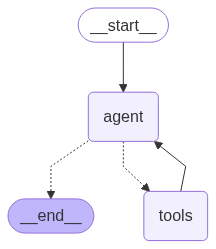

In [ ]:
from IPython.core.display import Image
display(Image(agent.get_graph().draw_mermaid_png()))

## Run the Agent and Display Messages

In [9]:
result = agent.invoke(
    input={"messages": [{"role": "user", "content": "what is the weather in sf?"}]},
    debug=False
)

result

{'messages': [HumanMessage(content='what is the weather in sf?', additional_kwargs={}, response_metadata={}, id='5643be8d-56bd-4d7d-99b7-e0b0c521cd17'),
  AIMessage(content=[{'text': "I'll help you get the weather for San Francisco. Let me check that for you.", 'type': 'text'}, {'id': 'toolu_01GyTH7u2qHrw3bLDDNwhN4S', 'input': {'city': 'sf'}, 'name': 'get_weather', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_019J9aQeG6q2r3LdT69UWb96', 'model': 'claude-3-7-sonnet-20250219', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 388, 'output_tokens': 72, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-3-7-sonnet-20250219'}, id='run--404c117c-d71c-4851-841c-8ef8015c27d4-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'toolu_01GyTH7u2qHrw3bLDDNwhN4S', 'type': 'tool_call'}], usage_metadata={'input_tokens': 388, 'output_tokens': 

In [14]:
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],add_messages]
    
initial_state = AgentState(
    messages=[
        HumanMessage(content="What is the weather in NY?")
    ]
)
    
states = agent.stream(
    input=initial_state,
    stream_mode="values")

for state in states:
    state["messages"][-1].pretty_print()


================================ Human Message =================================

What is the weather in NY?
================================== Ai Message ==================================

[{'text': "I'll check the current weather in New York for you.", 'type': 'text'}, {'id': 'toolu_012ZoPs5MBsepq7sZj5PsBaf', 'input': {'city': 'NY'}, 'name': 'get_weather', 'type': 'tool_use'}]
Tool Calls:
  get_weather (toolu_012ZoPs5MBsepq7sZj5PsBaf)
 Call ID: toolu_012ZoPs5MBsepq7sZj5PsBaf
  Args:
    city: NY
================================= Tool Message =================================
Name: get_weather

It's always sunny in NY!
================================== Ai Message ==================================

According to the weather information, it's currently always sunny in NY! Looks like New York is enjoying some great weather today.
